### 1. Introduction:

####  Objective:

Coronary Heart Disease (CHD) involves the reduction of blood flow to the heart muscle due to build-up of plaque in the arteries of the heart. Risk factors include hypertension, smoking , diabetes, obesity, and high cholesterol.

In 2017, 110 million people were diagnosed with Coronary Heart Disease (CHD) resulting in 8.9 million deaths, making it the most common death globally.

Early prognosis of CHD in high risk patients can aid in making decisions on lifestyle changes. If caught in time, lifestyle changes will reduce complications and thus save lives.

There are two parts in this research: The first half will use a Linear Regression Model to determine if other risk factors have a significant impact on BMI and the second half will use the Logistic Regression Model to classify whether or not the patients will have CHD within ten years given having other risk factors.
     

### 2. Exploratory Data Analysis (EDA)

####    2.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
import itertools
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Import Dataset

In [3]:
df= pd.read_csv('framingham_heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### 2.3 Data Cleaning

In [4]:
df = df.apply(lambda x: x.fillna(x.mean())) 

#### 2.4 Baisc Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4238 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4238 non-null float64
BPMeds             4238 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4238 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4238 non-null float64
heartRate          4238 non-null float64
glucose            4238 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


In [6]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Data Distributions

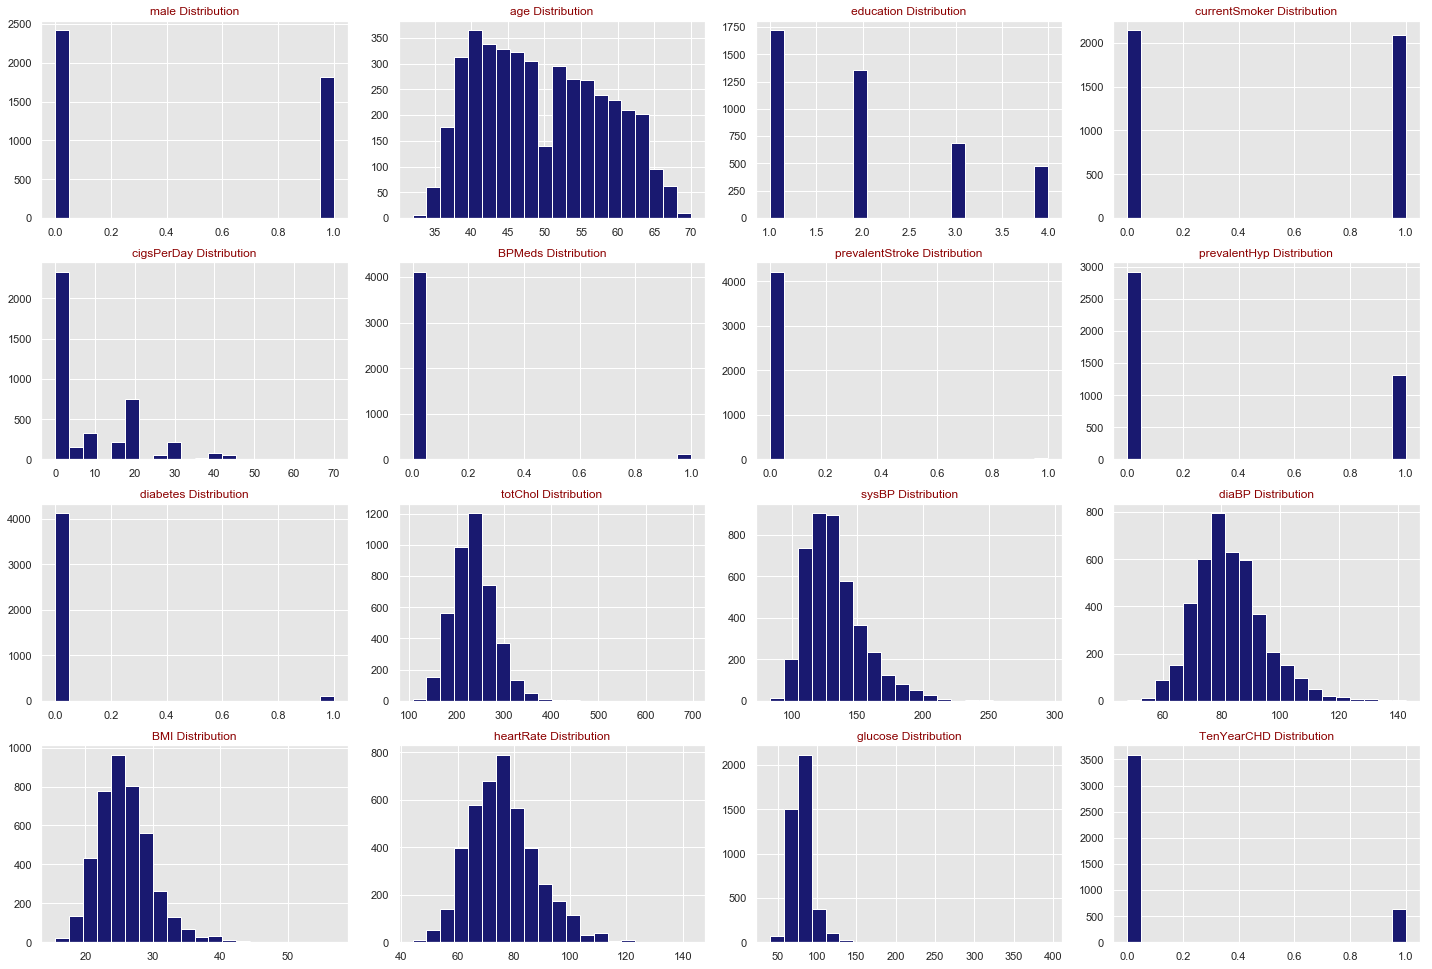

In [119]:
def plot_hists(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
plot_hists(df,df.columns,6,4)

. The features totChol, diaBP, BMI, and heartRate are normally distributed.

. Feature Age can be considered as normally distributed.

. Target variable TenYearCHD is significantly imbalanced.

. The number of people having diabetes, and taking hypertension pills are significantly low.

. Majority of patient with blood glucose are in normal range <= 100 mg/dL


#### 1. Linear Regression

#### Pair Plots
. Features were selected based on continuous data
. Various omparison between pairs to examine relationship among features

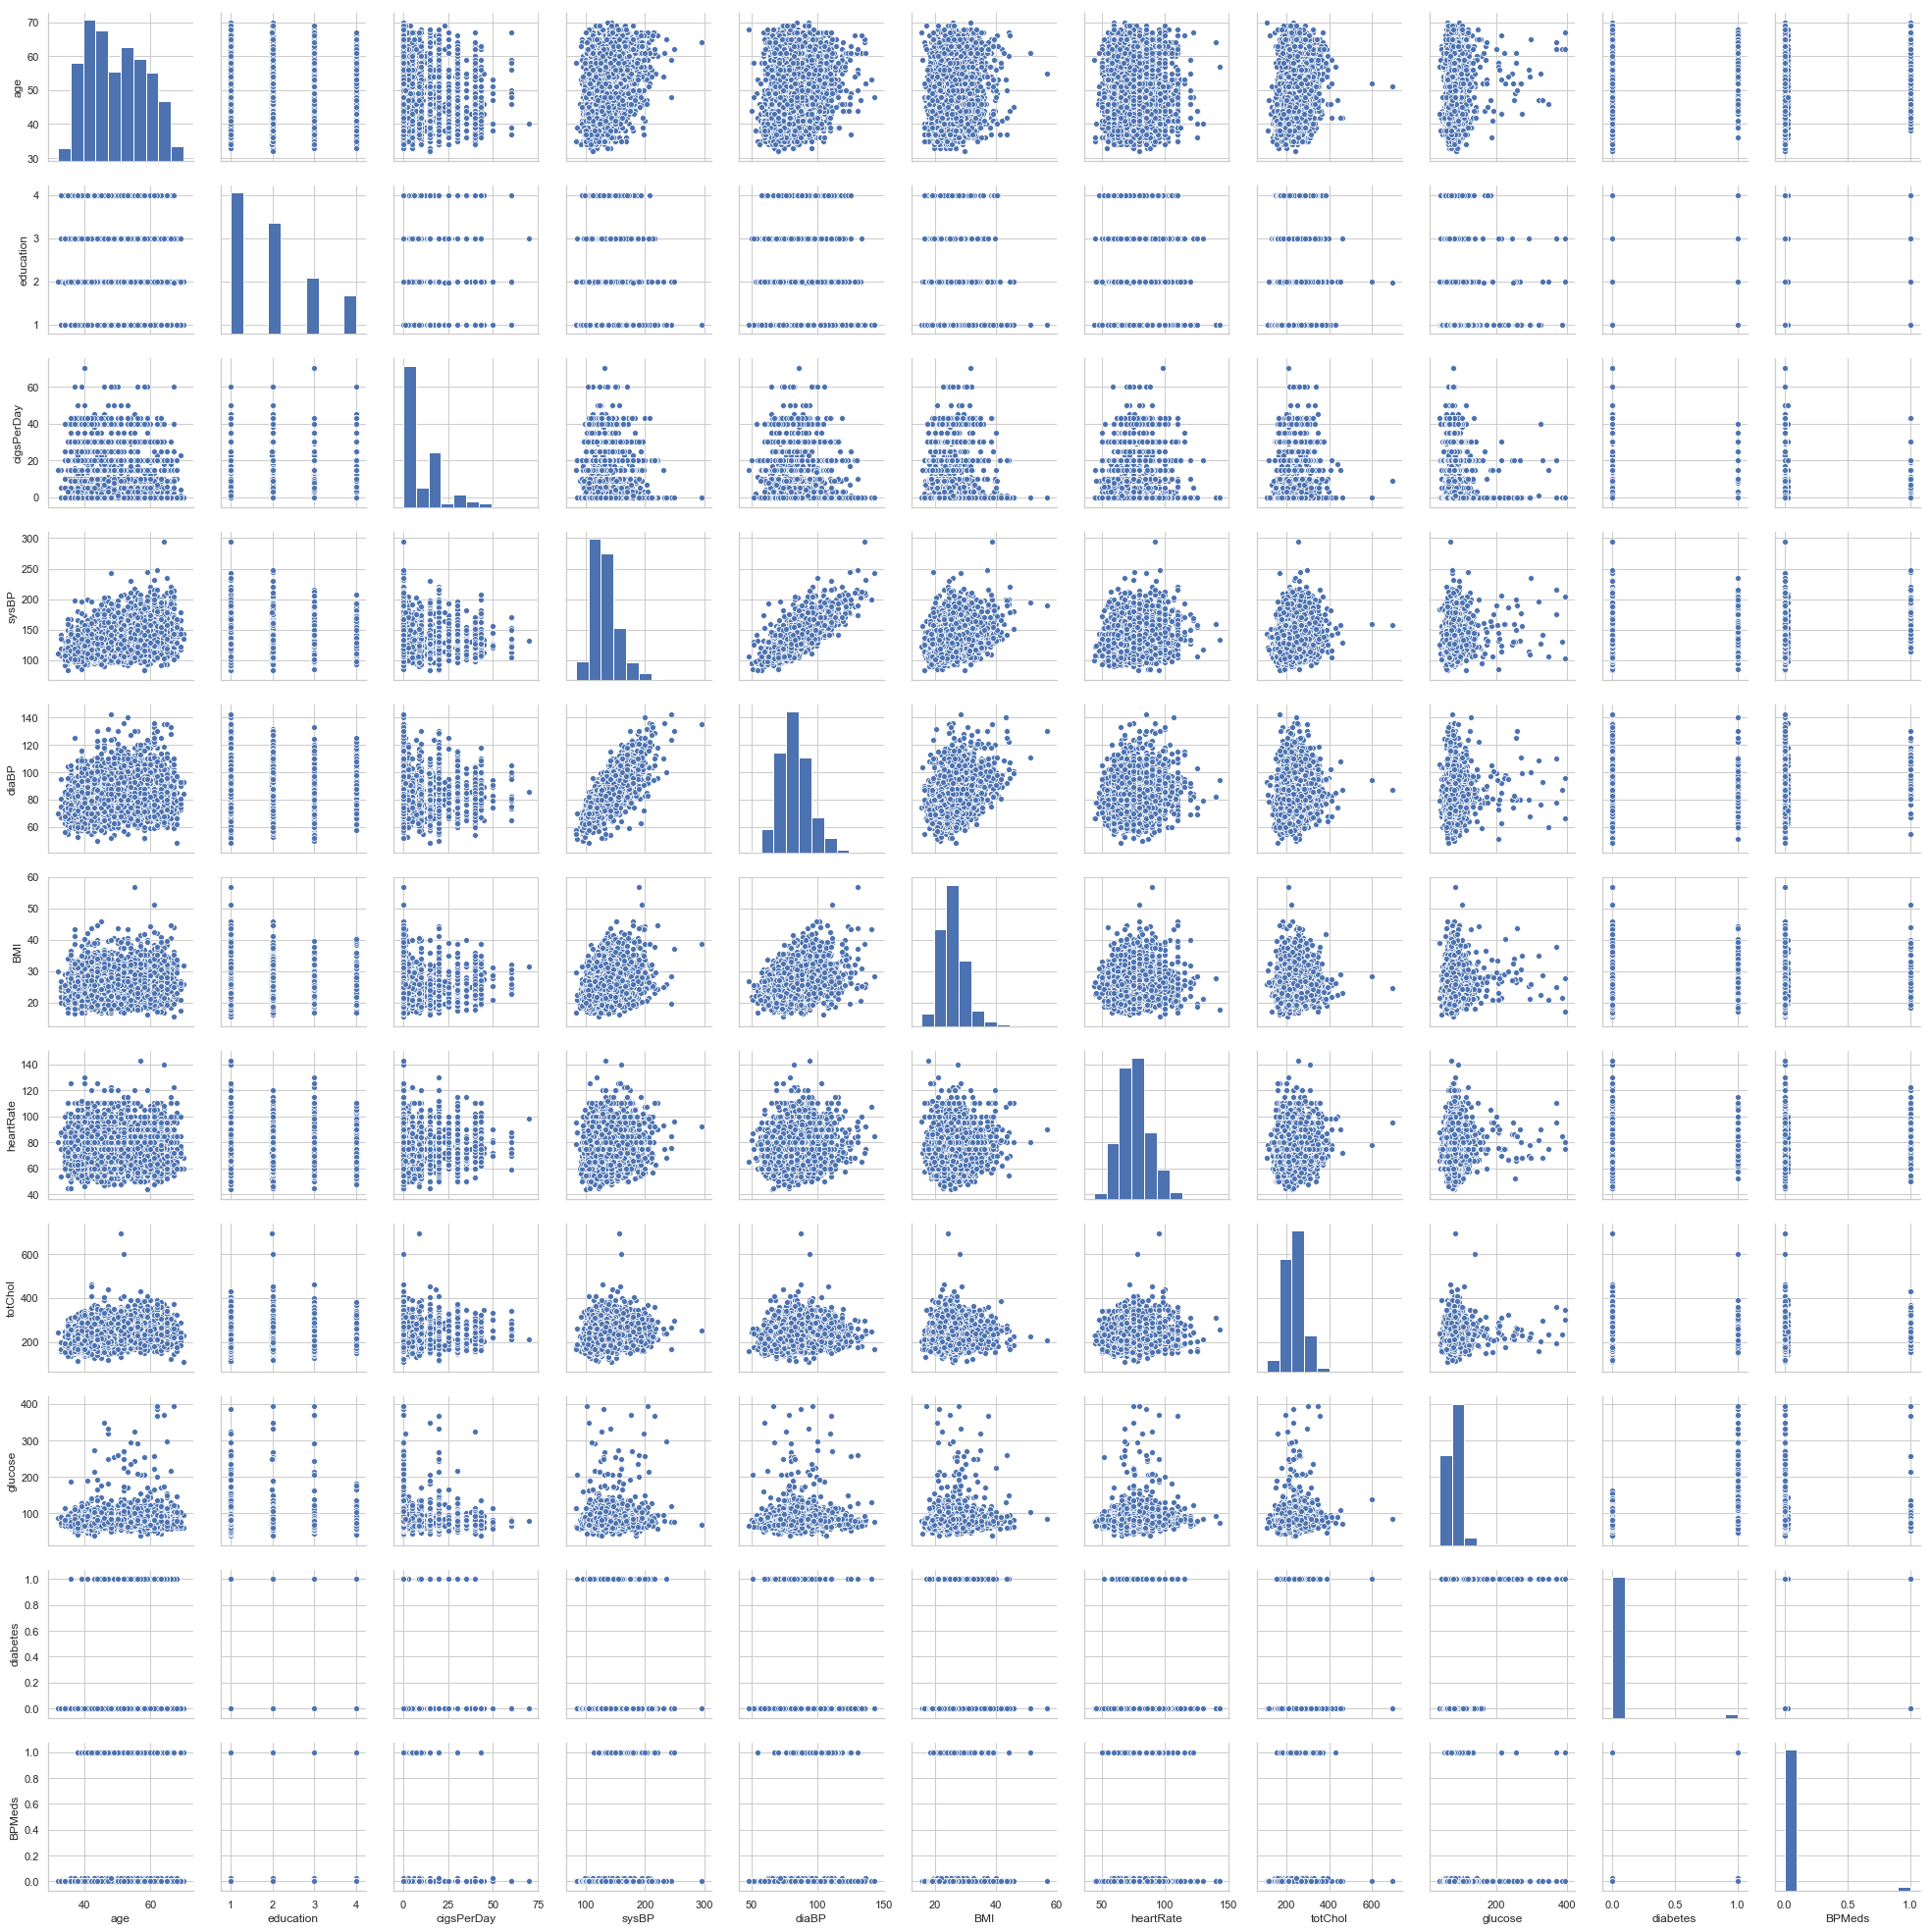

In [201]:
new_features = ['age','education','cigsPerDay','sysBP','diaBP','BMI','heartRate','totChol','glucose','diabetes','BPMeds']

sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(df[new_features],height = 2.5,x_vars= new_features,y_vars= new_features)
plt.show()

. There is no features pairs that represents the dependencies except for the sysBP and diaBP which is what we expected to see.

#### Correlation Heat Map
. Is used to check for comultilinearity

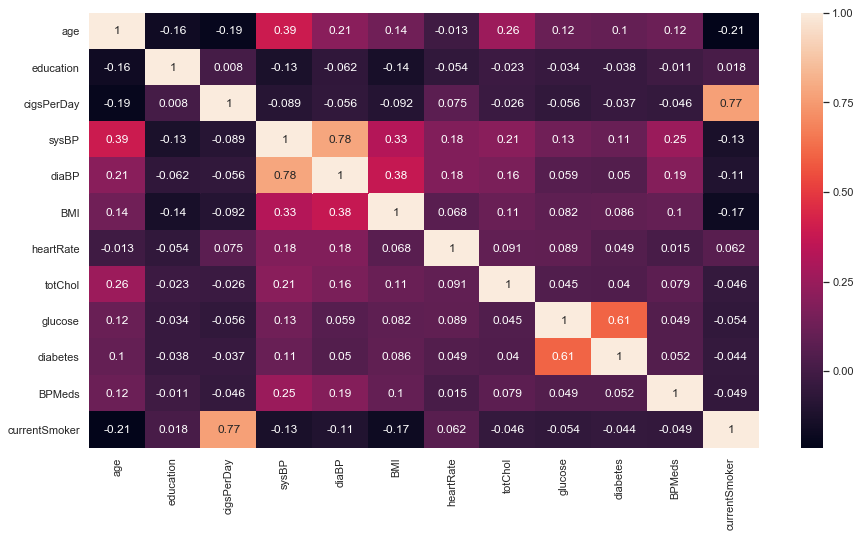

In [194]:

fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(df[new_features].corr(), annot = True)
plt.show()

. Correlation coefficients: 

    . sysBP/diaBP = 0.78
    . age/sysBP = 0.39
    . glucose/diabetes = 0.61
    . diaBP/BMI = 0.38
    . age/totChol = 0.26

In [202]:
new_features = ['age','sysBP','diaBP','glucose','diabetes','totChol','currentSmoker','cigsPerDay']
x1 = df[new_features]
y = df['BMI']

x_train,x_test,y_train,y_test = train_test_split(x1, y, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     79.33
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          4.26e-119
Time:                        19:31:13   Log-Likelihood:                -8121.0
No. Observations:                2966   AIC:                         1.626e+04
Df Residuals:                    2957   BIC:                         1.631e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.8137      0.708     20

. Features age, sysBP,glucose, and totChol have p-value greater than 0.05, we will exclude these features from our next iteration.


In [203]:
new_cols =['diaBP','diabetes','currentSmoker','cigsPerDay']
x2 = df[new_cols]
y =df['BMI']

x_train,x_test,y_train,y_test = train_test_split(x2, y, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          4.53e-121
Time:                        19:52:31   Log-Likelihood:                -8126.2
No. Observations:                2966   AIC:                         1.626e+04
Df Residuals:                    2961   BIC:                         1.629e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.9651      0.504     31

. Adding male feature to our model to see if it can increase R-squared value

In [206]:
new_cols =['diaBP','diabetes','currentSmoker','cigsPerDay','male']
x3 = df[new_cols]
y =df['BMI']

x_train,x_test,y_train,y_test = train_test_split(x3, y, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     130.1
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          7.28e-125
Time:                        19:57:24   Log-Likelihood:                -8114.8
No. Observations:                2966   AIC:                         1.624e+04
Df Residuals:                    2960   BIC:                         1.628e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.8853      0.503     31

In [207]:
new_cols =['diaBP','diabetes','currentSmoker','male']
x4 = df[new_cols]
y =df['BMI']

x_train,x_test,y_train,y_test = train_test_split(x4, y, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     162.5
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          6.69e-126
Time:                        19:58:05   Log-Likelihood:                -8115.0
No. Observations:                2966   AIC:                         1.624e+04
Df Residuals:                    2961   BIC:                         1.627e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.8714      0.502     31

In [208]:
new_cols =['diaBP','diabetes','currentSmoker','male', 'education']
x5 = df[new_cols]
y =df['BMI']

x_train,x_test,y_train,y_test = train_test_split(x5, y, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          1.43e-134
Time:                        19:59:15   Log-Likelihood:                -8092.3
No. Observations:                2966   AIC:                         1.620e+04
Df Residuals:                    2960   BIC:                         1.623e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.9834      0.525     32

### Model evaluation:
- **AIC:** =  1.633e+04 and it hasn't change from iteration 1 to iteration 5.


- **Adjusted R-squared:** Value has changed from 0.174 to 0.191, it is slightly increase but not much.


- **Individual variable's p-value (P>|t|):** None of the variables are insignificant; all p- values are less than 0.05.


- **Individual variable's VIF:** All variables are less than five. Hence, we do not need to remove any further variable based on VIF value.

- ** No strong linear relationship between the BMI and other risk factors exists.**

#### 2. Logistics Regression 

In [6]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

##### TenYearCHD Distribution

In [7]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

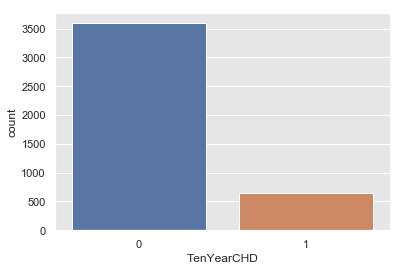

In [161]:
sns.countplot(x ='TenYearCHD',data =df)

##### Create initial logistic model

In [8]:
X = df[df.columns[:-1]]
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)

log_reg = LogisticRegression(C=1.0, class_weight ='balanced', penalty ='l1')
model_log = log_reg.fit(X_train, y_train)
print(model_log)

y_pred = log_reg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.6674528301886793


In [9]:
X = df[df.columns[:-1]]
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)

log_reg = LogisticRegression(C= 100.0, class_weight ='balanced', penalty ='l1')
model_log = log_reg.fit(X_train, y_train)
print(model_log)

y_pred = log_reg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.6674528301886793


##### C prarameter has been modified with various values. At the optimal value where  C = 1.0 , then the model  yields an accuracy of 66.75%.

### Model Evaluation using Confusion Matrix

[[713 363]
 [ 60 136]]


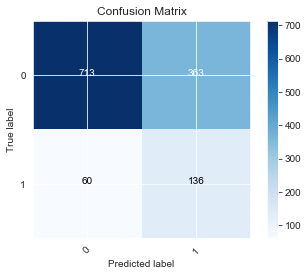

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cnf_matrix.max() / 2 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.colorbar()


print(cnf_matrix)

#### Confusion Matrix Evaluation Metrics

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6674528301886793
Precision: 0.2725450901803607
Recall: 0.6938775510204082
f1_score: 0.39136690647482014


#### Create a ROC curve

AUC: 0.7330911918670815


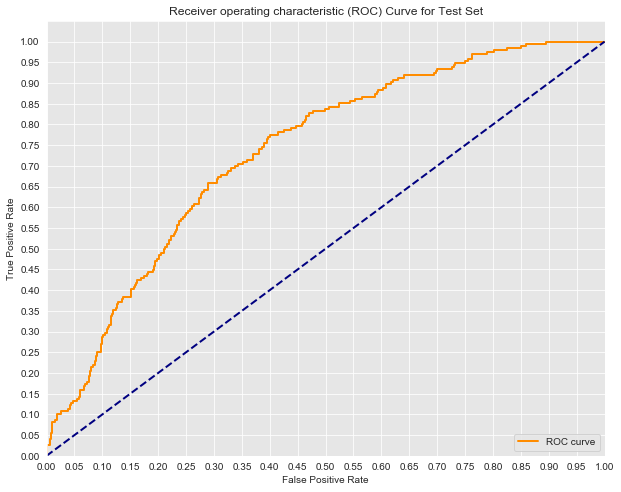

In [12]:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()


#### Conclusion:
*** Our model is not as good as it should be for detecting CHD. The true positive rate is more important than the false positive rate because it  determines the percentage of patients with CHD who are correctly identified and warned. When TPR increases FPR also increases which is not good. When TPR = 0.9, we correctly identify and warn 90 out of 100 patients with CHD.  However, at the same time, FPR = 0.6 meaning that more than half of the time, we incorrectly warn a patient about CHD who is actually healthy!!!
We need another model with enhanced accuracy that predicts better results.  This may be achieved with data sets identifying the critical, specific factors present in patients with CHD. We can also increase the size of datasets if it is available.